In [1]:
from gravpop_pipe import *

In [2]:
P = Parser("/Users/asadh/Documents/GitHub/gravpop_pipe/tests/model.ini")
P.run()

(N_events, N_samples_per_event) =  (69, 3194)


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8200/8200 [00:02<00:00, 2867.43it/s, 6 steps of size 3.65e-01. acc. prob=0.60]



                  mean       std    median      5.0%     95.0%     n_eff     r_hat
       alpha      3.74      4.75      3.63     -3.99     10.34    508.68      1.00
        beta      2.45      2.64      2.47     -1.99      6.05    443.04      1.00
     delta_m      6.02      3.44      6.02      0.88     11.46    433.88      1.00
         lam      0.48      0.29      0.46      0.01      0.90    300.57      1.00
        lamb      0.26      5.76      0.33     -7.74      9.98   1084.75      1.00
        mmax     85.12      8.73     85.23     72.93     99.87    674.72      1.00
        mmin      6.00      2.27      5.98      2.42      9.47    774.60      1.00
         mpp     34.78      8.70     34.75     20.09     46.89   1551.35      1.00
      mu_chi      0.50      0.17      0.50      0.22      0.78    655.83      1.00
   sigma_chi      0.03      0.02      0.03      0.01      0.06    577.53      1.00
  sigma_spin      2.64      1.34      2.64      0.73      4.93    948.05      1.00
   

In [3]:
import inspect

print(inspect.getsource(P.sampler.model))

    def model(self):
        for var,dist in self.priors.items():
            self.x[var] = numpyro.sample(var, dist)

        if len(self.constraints) != 0:
            for i in range(len(self.constraints)):
                numpyro.factor(str(i), self.constraints[i].logpdf(self.x))

        if self.just_prior:
            return None

        numpyro.factor('logP', self.likelihood.logpdf(self.x))



In [4]:
P.constraints[0].logpdf(P.sampler.samples.iloc[0,:].to_dict())

Array(0., dtype=float32, weak_type=True)

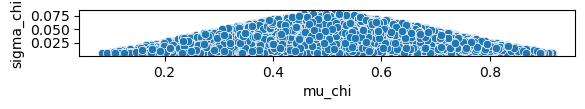

In [6]:
df_test = P.sampler.samples[['mu_chi', 'sigma_chi']]

import seaborn as sns

#corner.corner(df_test.values, labels=df_test.columns)
ax = sns.scatterplot(df_test, x='mu_chi', y='sigma_chi')
ax.set_aspect(1)

In [ ]:
from dataclasses import dataclass, field
from typing import List, Dict, Union, Optional

@dataclass
class AlphaBetaPrior:
    mu : List[str] = field(default_factory=lambda : [0,1])
    sigma : List[str] = field(default_factory=lambda : [1/200,1/4])
    
    def 

In [37]:
def my_model():
    mu_chi = numpyro.sample('mu_chi', dist.Uniform(0,1))
    sigma_chi = numpyro.sample('sigma_chi', dist.Uniform(1/200, jnp.minimum(mu_chi**2 *(1-mu_chi)/(1+mu_chi), mu_chi * (1-mu_chi)**2 /(2-mu_chi))))

In [38]:
mu_var_max_to_alpha_beta_max(0.1, 0.1*(0.9), amax=1)

(1.9274705288631186e-17, 0.0, 1)

In [39]:
seed = np.random.randint(2*30)
rng_key = jax.random.PRNGKey(seed)
rng_key, rng_key_ = jax.random.split(rng_key)


# Run NUTS.
kernel = NUTS(my_model, target_accept_prob=0.7)
num_samples = 80000
mcmc = MCMC(kernel, num_warmup=200, num_samples=num_samples)
mcmc.run(rng_key_)
mcmc.print_summary()
the_samples = mcmc.get_samples()
the_samples = pd.DataFrame(the_samples)

sample: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80200/80200 [00:08<00:00, 9181.34it/s, 7 steps of size 6.52e-01. acc. prob=0.85]



                 mean       std    median      5.0%     95.0%     n_eff     r_hat
     mu_chi      0.50      0.25      0.50      0.09      0.85  46114.69      1.00
  sigma_chi      0.03      0.02      0.02      0.01      0.05  48824.20      1.00

Number of divergences: 16509


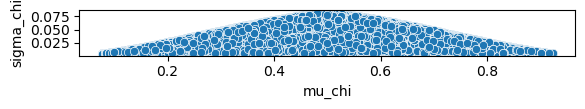

In [40]:
import seaborn as sns

#corner.corner(df_test.values, labels=df_test.columns)
ax = sns.scatterplot(the_samples, x='mu_chi', y='sigma_chi')
ax.set_aspect(1)

In [14]:
mu_var_max_to_alpha_beta_max(0.034, 0.081, 1)

(-0.020213629629629633, -0.5743048888888888, 1)

In [64]:
P3.hyper_posterior.mass_plot

MassPlot(model=<gravpop.models.mass.mass.SmoothedTwoComponentPrimaryMassRatio object at 0x2d9f39950>, mass_grid=Grid(grid_list=[Grid1D(name='mass_1_source', minimum=2, maximum=100, N=200, latex_name='$m_1$'), Grid1D(name='mass_ratio', minimum=0, maximum=1, N=200, latex_name='$q$')]), confidence_interval=0.95, rate=False, chunk=20)

In [53]:
P3 = Parser("/Users/asadh/Documents/GitHub/gravpop_pipe/tests/model.ini")
P3.load("/Users/asadh/Documents/Data/result_24_march.csv")

(N_events, N_samples_per_event) =  (69, 3194)


In [54]:
from gwpopulation.models.redshift import PowerLawRedshift
from bilby.core.result import read_in_result
from scipy.interpolate import interp1d
import numpy as np
import deepdish as dd
import matplotlib.pyplot as plt

PP_path = '/Users/asadh/Documents/Data/analyses/PowerLawPeak/o1o2o3_mass_c_iid_mag_iid_tilt_powerlaw_redshift_result.json'
PP_result = read_in_result(PP_path)

PP_hyperposterior_samples = PP_result.posterior.sample(8000).copy() # making a copy is best practice here so you don't accidentally modify things in-place
PP_hyperposterior_samples

PP_hyperposterior_samples_dict = {col: PP_hyperposterior_samples[col].values for col in PP_hyperposterior_samples.columns}

#df_grav = pd.DataFrame(hyper_posterior_samples).sample(8000)
cols = ['alpha', 'beta', 'lam', 'mpp', 'sigpp', 'lamb', 'mmin', 'mmax', 'delta_m']
lvk_dict = {col:PP_hyperposterior_samples_dict[col][1:8000] for col in cols};

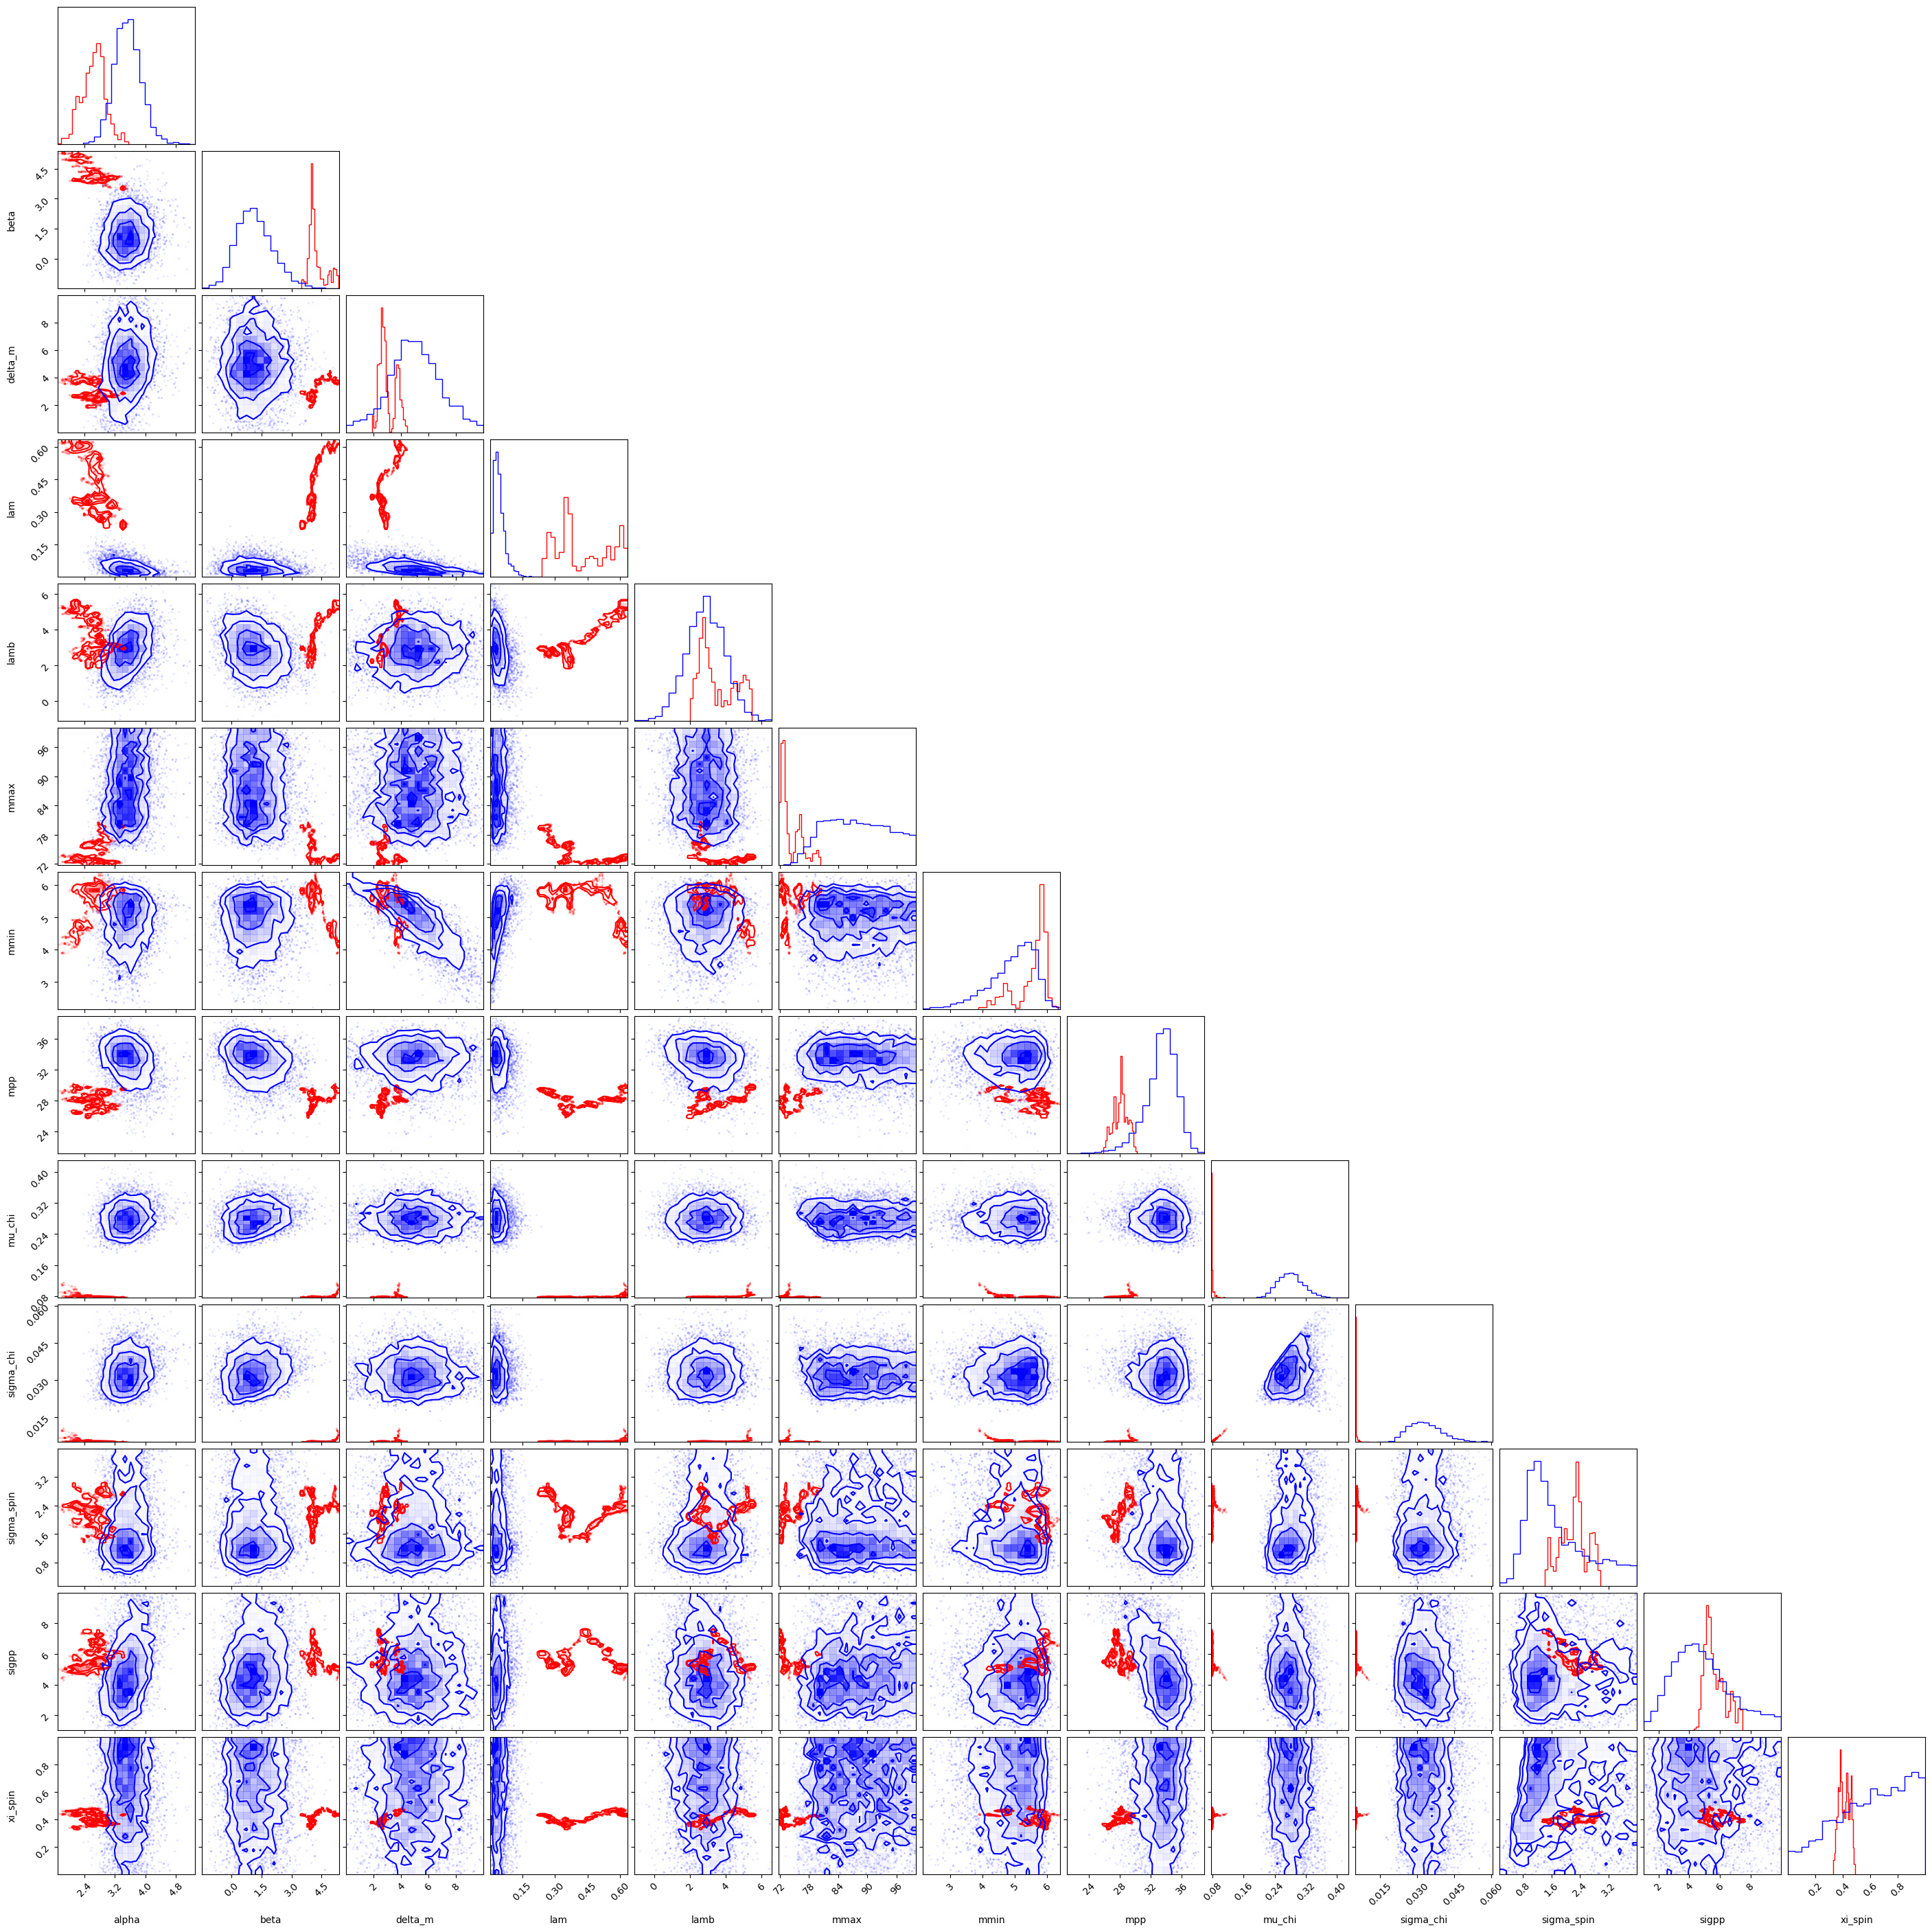

In [55]:
import corner

fig = corner.corner(P3.hyper_posterior.posterior, labels=P3.hyper_posterior.posterior.columns, color='r')
corner.corner(PP_hyperposterior_samples[P3.hyper_posterior.posterior.columns].values, labels=P3.hyper_posterior.posterior.columns, fig=fig, color='b');

In [52]:
post = P3.hyper_posterior.posterior
al,be,_ = mu_var_max_to_alpha_beta_max(post['mu_chi'], post['sigma_chi'],1)


al.min(), be.min()

(1.0000144694283806, 1.5886843429028825)

In [7]:
from gravpop import *

chi_grid = Grid([Grid1D("a_1", 0, 1, 100), Grid1D("a_2", 0, 1, 100)]).data
S = BetaSpinMagnitudeIID(parameterization="mu_sigma", 
                         var_names = ['a_1', 'a_2'])



S(chi_grid, {'mu_chi':0.1, 'sigma_chi':0.3, 'amax':1})

Array([[         inf,          inf,          inf, ...,          inf,
                 inf,          inf],
       [         inf,   108.41397 ,    52.51018 , ...,   461.59192 ,
         1413.0936  ,          inf],
       [         inf,    52.51018 ,    25.433247, ...,   223.57152 ,
          684.4303  ,          inf],
       ...,
       [         inf,   461.59192 ,   223.57152 , ...,  1965.3104  ,
         6016.4995  ,          inf],
       [         inf,  1413.0936  ,   684.4303  , ...,  6016.4995  ,
        18418.602   ,          inf],
       [         inf,          inf,          inf, ...,          inf,
                 inf,          inf]], dtype=float32)

In [14]:
import gwpopulation


gwpopulation.models.spin.iid_spin_magnitude_beta(chi_grid, alpha_chi=-0.07, beta_chi=-0.63)

/Users/asadh/anaconda3/lib/python3.11/site-packages/gwpopulation/utils.py:87: RuntimeWarning: divide by zero encountered in log
  ln_beta = (alpha - 1) * xp.log(xx) + (beta - 1) * xp.log(scale - xx)


Array([[        inf,         inf,         inf, ...,         inf,
                inf,         inf],
       [        inf,   108.41381,    52.51016, ...,   461.59146,
         1413.092  ,         inf],
       [        inf,    52.51016,    25.43326, ...,   223.57152,
          684.4302 ,         inf],
       ...,
       [        inf,   461.59146,   223.57152, ...,  1965.3093 ,
         6016.4956 ,         inf],
       [        inf,  1413.092  ,   684.4302 , ...,  6016.4956 ,
        18418.586  ,         inf],
       [        inf,         inf,         inf, ...,         inf,
                inf,         inf]], dtype=float32)

In [13]:
BETA_CONVERTER.mu_var_max_to_alpha_beta_max(mu=0.1, var=0.3, amax=1)

(-0.06999999999999999, -0.63, 1)

In [18]:
import gwpopulation
from bilby.core.prior import Constraint, LogUniform, ConditionalPriorDict

def load_prior(args):
    filename = get_path_or_local(args.prior_file)
    hyper_prior = ConditionalPriorDict(filename=filename)
    hyper_prior.conversion_function = prior_conversion
    if args.rate:
        hyper_prior["rate"] = LogUniform(
            minimum=1e-1,
            maximum=1e3,
            name="rate",
            latex_label="$R$",
            boundary="reflective",
        )
    return hyper_prior


@dataclass
class quickargs:
    prior_file = "./gwpop_prior.prior"
    rate = False
theprior = load_prior(quickargs())

In [22]:
import pandas as pd

df = pd.DataFrame(theprior.sample(size=8000))

In [31]:
import corner

test_df = df[['mu_chi','sigma_chi']]

#corner.corner(test_df.values, labels=test_df.columns)


In [33]:
(df['mu_chi'] > 1).values & (df['mu_chi'] > 1).values

array([False, False, False, ..., False, False, False])

In [ ]:
import jax.numpy as jnp
from jax import random
from numpyro.distributions import Distribution
from numpyro.distributions.util import promote_shapes
from numpyro.distributions.constraints import real

class CustomUniform(Distribution):
    arg_constraints = {'x': real}
    support = real
    reparametrized_params = []

    def __init__(self, low=0., high=1., validate_args=None):
        self.low, self.high = low, high
        super(CustomUniform, self).__init__(validate_args=validate_args)

    #def sample(self, key, sample_shape=()):
    #    assert isinstance(sample_shape, tuple)
    #    return random.uniform(key, sample_shape + self.batch_shape, minval=self.low, maxval=self.high)

    def log_prob(self, value):
        return -jnp.log(self.high - self.low)  # Uniform distribution, so log probability is constant

    def expand(self, batch_shape, _instance=None):
        new = self._get_base_dist(batch_shape)
        new.low = self.low
        new.high = self.high
        return new


In [9]:
a = [].copy()
ss = lambda : []

In [13]:
a1 = ss()
a2 = ss()

a1.append(1)
a1,a2

([1], [])

In [15]:
from dataclasses import dataclass, field


@dataclass
class Asad:
    blah : List[str] = field(default_factory=lambda : [])
    
    
Asad()

Asad(blah=[])